<a href="https://colab.research.google.com/github/katemovlyan/hw_hillel_ml/blob/main/Hillel_home_work5_classification_kate_movlian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа 4. **CLASSIFICATION** 🔵/🔺


## Наставление

Данная лабораторная первая попытка продемонстрировать и обучить началам анализа данных. Большую часть заданий предоставленных тут, в реальной жизни придется ставить себе самостоятельно🧐. Проверять голые числа⚔️ - плохая затея, как для вас, так и для меня. Хорошая визуализация практически всегда помогает. Делайте графики самодостаточными. Идеальный отчет - это логический рассказ с иллюстрациями и вашими комментариями. Решение каждой задачи подразумевает аккуратное📝 оформление кода и комментариев к результатам его выполнения. Оформление комментариев должно производиться в текстовых ячейках ноутбука с использованием синтаксиса [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформления формул.

Основные библиотеки: [sklearn](http://scikit-learn.org/stable/), [pandas](http://pandas.pydata.org)

# May the Force be with you!


**Перед отправкой решений на проверку, добавьте в название файла свое имя и фамилию.**

Пример: ``` Hillel_home_work5_classification_philipp_kofman.ipynb```

Если вы нашли грамматические или любые другие ошибки - сообщите мне о них в приватных сообщениях 😇

### Метрика качества

В задании мы будем работать с метрикой AUC-ROC, которую в данном случае можно считать как долю неправильно упорядоченных пар объектов, отсортированных по возрастанию предсказанной оценки принадлежности классу 1 (более подробно можно узнать [здесь](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)). Детального понимания принципов работы метрики AUC-ROC для выполнения этой лабораторной не требуется. Но знать, что она есть вам нужно.

### Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, максимальная глубина решающего дерева). Каждая модель, как правило, имеет множество гиперпараметров и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, поэтому для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют перебор по сетке [grid search](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) : для каждого гиперпараметра выбирается несколько значений, далее перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения оптимизируемой метрики). Однако, в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать:

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе гиперпараметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение, валидация и тест. Валидационную подвыборку используют для сравнения моделей, а тестовую — для окончательной оценки качества и сравнения семейств моделей с подобранными гиперпараметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://bit.ly/1CHXsNH) . Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов:
  - сетку гиперпараметров можно делать более разреженной, перебирая меньше значений каждого гиперпараметра; однако, не стоит забывать, что в таком случае можно пропустить хорошую комбинацию гиперпараметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества становится более шумной и увеличивается риск выбрать неоптимальный набор гиперпараметров из-за случайности разбиения;
  - гиперпараметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации гиперпараметров, а небольшое число случайно выбранных.

## Предобработка данных

В этой лабораторной работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k.

Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

Загрузите набор данных *data.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [ ]:
import pandas as pd

data = pd.read_csv('data.csv', sep=', ', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
print(data.iloc[0:8])
print(data.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


   age         workclass  fnlwgt  ... hours-per-week  native-country income
0   39         State-gov   77516  ...             40   United-States  <=50K
1   50  Self-emp-not-inc   83311  ...             13   United-States  <=50K
2   38           Private  215646  ...             40   United-States  <=50K
3   53           Private  234721  ...             40   United-States  <=50K
4   28           Private  338409  ...             40            Cuba  <=50K
5   37           Private  284582  ...             40   United-States  <=50K
6   49           Private  160187  ...             16         Jamaica  <=50K
7   52  Self-emp-not-inc  209642  ...             45   United-States   >50K

[8 rows x 15 columns]
(32561, 15)


Иногда в данных встречаются пропуски. Способ обозначения пропусков либо прописывается в описании к данным, либо на месте пропуска после чтения данных оказывается значение [NaN](https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html). Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html).

В данном датасете пропущенные значения обозначены как "?".

**Задача 1.** Предобработка состоит в следующих простых шагах:
 - Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.
 - Сохраните целевую переменную в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками. Сохраните их отдельно.

Решение задачи оценивается в [2 балла].

In [ ]:
#code
income_data = data.copy()
# Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.
def anomalies_finder(df, features):
  bad_IDs = []
  for feature in features:
    for i, el in enumerate(df[feature]):
      if el == '?' or str(el).lower() == 'nan':
        bad_IDs.append(i)
  return bad_IDs

print('Initial shape: ', income_data.shape)
line_IDs_to_be_removed = anomalies_finder(income_data, list(income_data.columns))
print('Anomal rows: ', line_IDs_to_be_removed)
income_data.drop(line_IDs_to_be_removed, inplace=True)
print('Shape without anomalies: ', income_data.shape)

# Сохраните целевую переменную в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
target = [1 if inc == '>50K' else 0 for inc in income_data['income']]
income_data.drop('income', 1, inplace=True)
print('Shape without target variable: ', income_data.shape)

# Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками. Сохраните их отдельно.
num_features = income_data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
print('\nNumerical features:')
print(num_features.iloc[0:8])

Initial shape:  (32561, 15)
Anomal rows:  [27, 61, 69, 77, 106, 128, 149, 154, 160, 187, 201, 221, 226, 243, 266, 297, 312, 326, 346, 347, 354, 397, 408, 430, 431, 449, 459, 471, 484, 486, 499, 511, 515, 517, 518, 539, 576, 580, 590, 591, 596, 648, 656, 668, 671, 686, 695, 734, 788, 789, 792, 806, 811, 830, 834, 885, 890, 903, 924, 931, 969, 982, 1019, 1034, 1035, 1039, 1046, 1097, 1100, 1131, 1134, 1152, 1167, 1175, 1180, 1185, 1208, 1215, 1217, 1262, 1282, 1290, 1312, 1317, 1325, 1347, 1349, 1371, 1388, 1404, 1420, 1433, 1441, 1452, 1458, 1504, 1544, 1562, 1569, 1570, 1574, 1579, 1592, 1606, 1629, 1656, 1665, 1676, 1704, 1707, 1758, 1761, 1773, 1778, 1823, 1846, 1851, 1865, 1878, 1923, 1931, 1971, 1987, 2025, 2036, 2046, 2061, 2072, 2084, 2091, 2094, 2105, 2118, 2126, 2152, 2155, 2163, 2164, 2210, 2213, 2222, 2281, 2292, 2323, 2327, 2340, 2354, 2356, 2358, 2359, 2372, 2380, 2382, 2397, 2420, 2427, 2464, 2476, 2486, 2491, 2496, 2506, 2513, 2521, 2544, 2566, 2570, 2571, 2578, 2586, 259

###  Обучение классификаторов на первых парах

В данном разделе будет необходимо работать только с вещественными признаками и целевой переменной. Об остальных пока забудем.

В начале посмотрим как работает подбор гиперпараметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)

Значения остальных гиперпараметров оставляйте по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). В качестве схемы кросс-валидации используйте 5-Fold CV, которую можно задать с помощью класса [KFoldCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold).





**Задача 2.** Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего значения качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал(под доверительным интервалом будем предполагать среднее +- среднеквадратичное отклонение).

Для получения значения качества на каждом фолде, среднего значение качества и другой полезной информации можно воспользоваться полем [*cv results_*](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

Постройте графики и сделайте выводы на основании среднего.

Решение задачи оценивается в [2 балла].

Best score:  0.787547291840061
Best parameter:  8


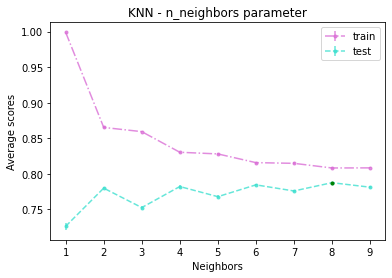

In [ ]:
#code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold

knn = KNeighborsClassifier()
neighbors_options = range(1, 10)
parameters = {'n_neighbors': neighbors_options}

# kf = KFold(n_splits=5)
# gs_knn = GridSearchCV(knn, parameters, cv=kf)

gs_knn = GridSearchCV(knn, parameters, return_train_score=True) # cv=None - 5-fold by default
gs_knn.fit(num_features, target)
results = gs_knn.cv_results_

best_index = gs_knn.best_index_
best_n_neighbors = results['params'][best_index]['n_neighbors']

means = results.get('mean_test_score')
stds = results.get('std_test_score')
means_train = results.get('mean_train_score')
stds_train = results.get('std_train_score')

print('Best score: ', means[best_index])
print('Best parameter: ', best_n_neighbors)

plt.errorbar(neighbors_options, means_train, stds_train, c='orchid', linestyle='-.', marker='.', alpha=0.8, label="train")
plt.errorbar(neighbors_options, means, stds, c='turquoise', linestyle='--', marker='.', alpha=0.8, label="test")
plt.scatter(best_n_neighbors, means[best_index], c='green', marker='.', zorder=10)
plt.xlabel("Neighbors")
plt.ylabel("Average scores")
plt.legend(loc="upper right")
plt.title("KNN - n_neighbors parameter")
plt.show()


Best score:  0.8285260971816811
Best parameter:  8


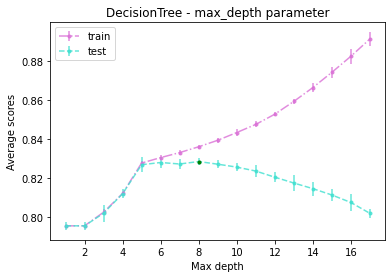

In [ ]:
#code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold

dec_tree = DecisionTreeClassifier()
max_depth_options = range(1, 18)
parameters = {'max_depth': max_depth_options}

gs_dec_tree = GridSearchCV(dec_tree, parameters, return_train_score=True) # cv=None - 5-fold by default
gs_dec_tree.fit(num_features, target)
results = gs_dec_tree.cv_results_

best_index = gs_dec_tree.best_index_
best_max_depth = results['params'][best_index]['max_depth']

means = results.get('mean_test_score')
stds = results.get('std_test_score')
means_train = results.get('mean_train_score')
stds_train = results.get('std_train_score')

print('Best score: ', means[best_index])
print('Best parameter: ', best_max_depth)

plt.errorbar(max_depth_options, means_train, stds_train, c='orchid', linestyle='-.', marker='.', alpha=0.8, label="train")
plt.errorbar(max_depth_options, means, stds, c='turquoise', linestyle='--', marker='.', alpha=0.8, label="test")
plt.scatter(best_max_depth, means[best_index], c='green', marker='.', zorder=10)
plt.xlabel("Max depth")
plt.ylabel("Average scores")
plt.legend(loc="upper left")
plt.title("DecisionTree - max_depth parameter")
plt.show()


Best parameter:  modified_huber


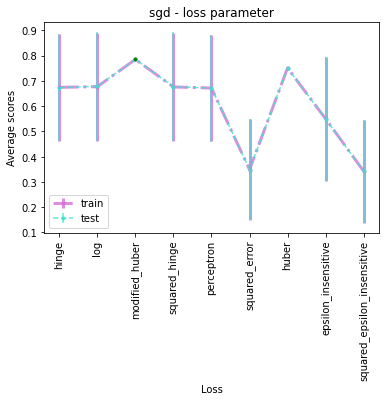

In [ ]:
#code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, KFold

sgd = SGDClassifier(max_iter=12000) # default value max_iter=1000 wasn't enough
# Все варианты подходят для классификации?
loss_options = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
parameters = {'loss': loss_options}

gs_sgd = GridSearchCV(sgd, parameters, return_train_score=True) # cv=None - 5-fold by default
gs_sgd.fit(num_features, target)
results = gs_sgd.cv_results_

best_index = gs_sgd.best_index_
best_loss = results['params'][best_index]['loss']

means = results.get('mean_test_score')
stds = results.get('std_test_score')
means_train = results.get('mean_train_score')
stds_train = results.get('std_train_score')

print('Best score: ', means[best_index])
print('Best parameter: ', best_loss)

plt.errorbar(loss_options, means_train, stds_train, c='orchid', linestyle='-.', marker='.', linewidth=3, alpha=0.8, label="train")
plt.errorbar(loss_options, means, stds, c='turquoise', linestyle='--', marker='.', alpha=0.8, label="test")
plt.scatter(best_loss, means[best_index], c='green', marker='.', zorder=10)
plt.xlabel("Loss")
plt.xticks(range(len(loss_options)), loss_options, rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.ylabel("Average scores")
plt.legend(loc="lower left")
plt.title("SGD - loss parameter")
plt.show()

# Эта штука возвращала разные ответы - дважды perceptron и дважды modified_huber. Почему?

**Задача 3.** Теперь подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев. Подберите количество деревьев, начиная с которого качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента вам потребуется много времени т. к. тренеровка большого количества лесов очень затратная операция. В дальнейших экспериментах используйте найденное количество деревьев.

Применить класс *GridSearchCV* в данном задании практически не возможно, поэтому предлагается самостоятельно написать цикл по числу деревьев.

Решение задачи оценивается в [2 балла].

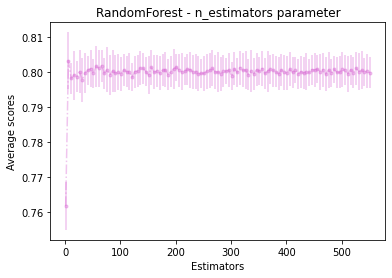

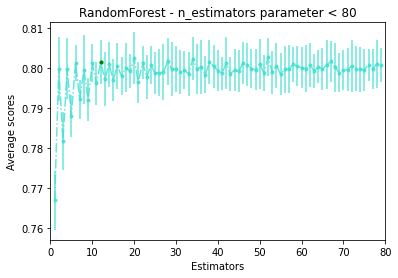

Best score:  0.801571381689047
Best parameter:  12


In [ ]:
#code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

n_estimators_options = range(1, 555, 5)
n_to_scores = {}
kf = KFold(n_splits=7, random_state=1, shuffle=True)

for n in n_estimators_options:
  rand_forest = RandomForestClassifier(n_estimators=n)
  scores = cross_val_score(rand_forest, num_features, target, scoring='accuracy', cv = kf, n_jobs=-1)
  n_to_scores[n] = (np.mean(scores), np.std(scores))
  # print(n, ': accuracy = %.6f(+-%.6f)' % (np.mean(scores), np.std(scores)))

plt.errorbar(n_to_scores.keys(), [v[0] for v in n_to_scores.values()], [v[1] for v in n_to_scores.values()], c='orchid', linestyle='-.', marker='.', alpha=0.4, label="train")
plt.xlabel("Estimators")
plt.ylabel("Average scores")
plt.title("RandomForest - n_estimators parameter")
plt.show()

n_estimators_options_small = range(1, 80)
n_to_scores_small = {}
kf = KFold(n_splits=7, random_state=1, shuffle=True)

for n in n_estimators_options_small:
  rand_forest = RandomForestClassifier(n_estimators=n)
  scores = cross_val_score(rand_forest, num_features, target, scoring='accuracy', cv = kf, n_jobs=-1)
  n_to_scores_small[n] = (np.mean(scores), np.std(scores))
  # print(n, ': accuracy = %.6f(+-%.6f)' % (np.mean(scores), np.std(scores)))


best_index = 12
best_n_estimators = n_to_scores_small.get(best_index)[0]

plt.errorbar(n_to_scores_small.keys(), [v[0] for v in n_to_scores_small.values()], [v[1] for v in n_to_scores_small.values()], c='turquoise', linestyle='-.', marker='.', alpha=0.8, label="train")
plt.scatter(best_index, best_n_estimators, c='green', marker='.', zorder=10)
plt.xlabel("Estimators")
plt.ylabel("Average scores")
plt.title("RandomForest - n_estimators parameter < 80")
plt.xlim([0, 80])
plt.show()

print('Best score: ', best_n_estimators)
print('Best parameter: ', best_index)

## Масштабирование

**Задача 4.** Посмотрите на значения признаков *age*, *fnlwgt*, *capital-gain*. В чем заключается особенность данных? На какие из рассматриваемых алгоритмов это может повлиять? Может ли масштабирование повлиять на работу этих алгоритмов? Почему?(попытайтесь объяснить природу изменения) Предложите свой вариант масштабирования.

Решение задачи оценивается в [1 бал].

(array([8.06431627e-05, 9.54717544e-05, 1.34066719e-05, 4.44857749e-05,
        3.55479937e-06, 1.01565696e-07, 4.57045633e-06, 0.00000000e+00,
        3.04697088e-07, 2.03131392e-07]),
 array([  114. ,  4233.6,  8353.2, 12472.8, 16592.4, 20712. , 24831.6,
        28951.2, 33070.8, 37190.4, 41310. ]),
 <a list of 10 Patch objects>)

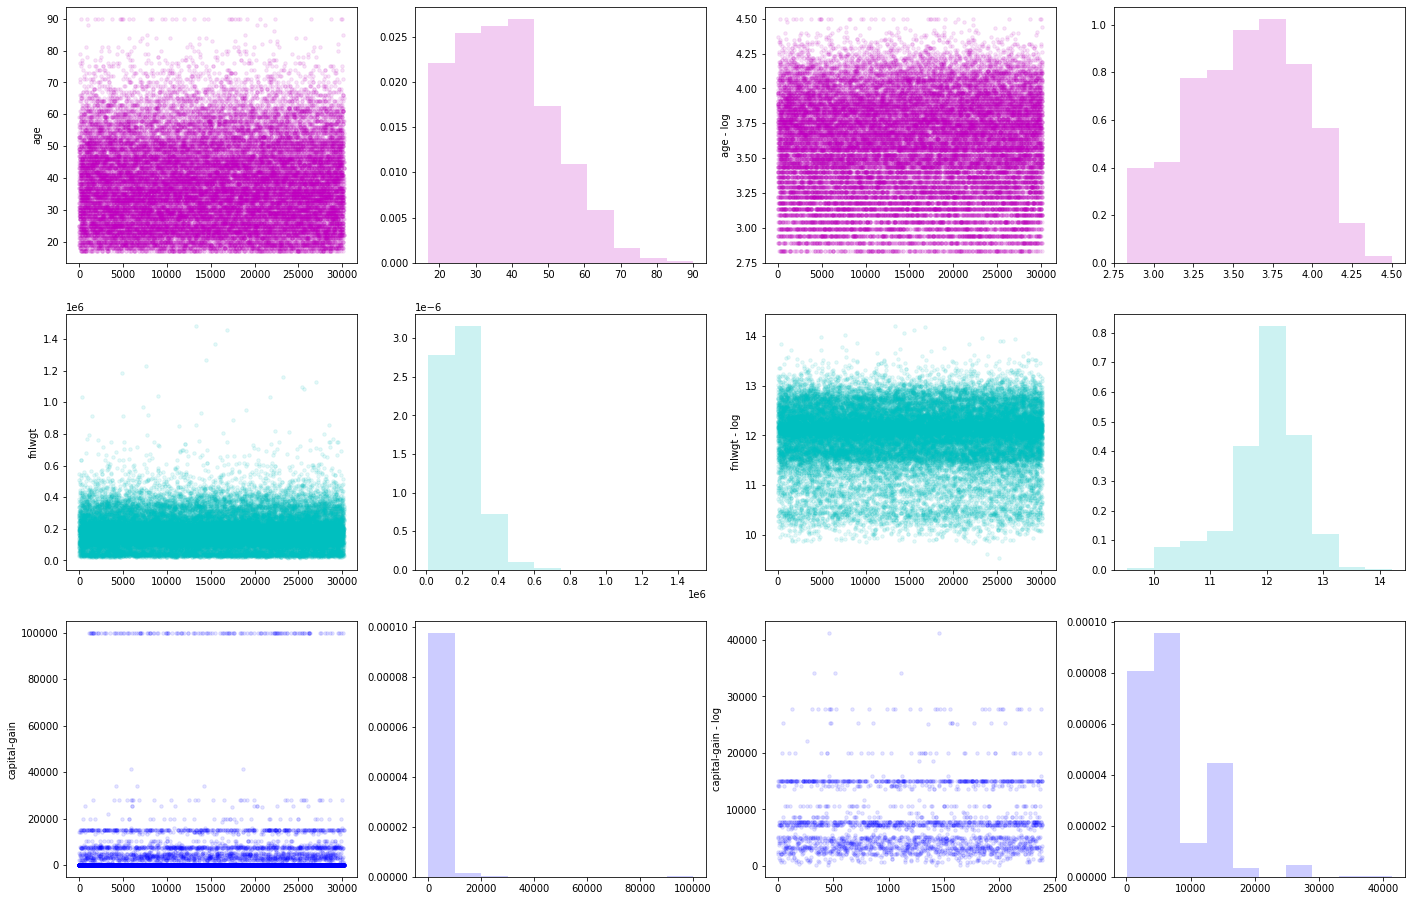

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

age = num_features['age'].tolist()
fnlwgt = num_features['fnlwgt'].tolist()
capital_gain = num_features["capital-gain"].tolist()

f,ax = plt.subplots(3, 4, figsize=(24, 16))
# Original data
ax[0][0].scatter(range(len(age)), age, s=12, c='m', alpha=0.1)
ax[0][0].set(ylabel='age')
ax[0][1].hist(age, density=True, color='m', alpha=0.2)

ax[1][0].scatter(range(len(fnlwgt)), fnlwgt, s=12, c='c', alpha=0.1)
ax[1][0].set(ylabel='fnlwgt')
ax[1][1].hist(fnlwgt, density=True, color='c', alpha=0.2)

ax[2][0].scatter(range(len(capital_gain)), capital_gain, s=12, c='b', alpha=0.1)
ax[2][0].set(ylabel='capital-gain')
ax[2][1].hist(capital_gain, density=True, color='b', alpha=0.2)

# Log-scaled data
ax[0][2].scatter(range(len(age)), np.log(age), s=12, c='m', alpha=0.1)
ax[0][2].set(ylabel='age - log')
ax[0][3].hist(np.log(age), density=True, color='m', alpha=0.2)

ax[1][2].scatter(range(len(fnlwgt)), np.log(fnlwgt), s=12, c='c', alpha=0.1)
ax[1][2].set(ylabel='fnlwgt - log')
ax[1][3].hist(np.log(fnlwgt), density=True, color='c', alpha=0.2)

capital_gain_log = [c for c in capital_gain if c > 0 and c < 99999]
ax[2][2].scatter(range(len(capital_gain_log)), capital_gain_log, s=12, c='b', alpha=0.1)
ax[2][2].set(ylabel='capital-gain - log')
ax[2][3].hist(capital_gain_log, density=True, color='b', alpha=0.2)

ОПИСАНИЕ ВАШЕГО МЕТОДА

capital-gain имеет часто встречающиеся граничные значения 0 и 99999, верхнее значение может на самом деле означать >=99999 и не показывать конкретное значение. Кажется, что для этого случая может использоваться бинарный признак 'capital-gain >= 99999' и рассматриваться отдельно от capital-gain
Даже после отсечения данных вне диапазона (1; 99999) прослеживается ступенчатая структура. Возможно, эту переменную можно рассматривать как дискретную, разделив все данные на несколько групп?

Минимальный возраст в датасете - 17 лет, потому age можно отсчитывать от этого стартового значения. Или же найти средний возраст и отсчитывать остальные значения age от него

age и fnlwgt можно привести к нормальному распределению с помощью логарифмического масштаба, но это не очень помогло в прошлой домашке)

Масштабирование признаков можно выполнить, например, одним из следующих способов:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).

**Задача 5.** Отмасштабируйте все вещественные признаки одним из указанных выше способов и подберите оптимальные значения гиперпараметров аналогично пункту выше.

Опишите теоретическое изменения качества алгоритмов до и после нормирования. Поменялся ли лидер после масштабирования? Почему?

Решение задачи оценивается в [2 балла].

-----  KNeighborsClassifier()  -----
Best score:  0.8086335884289809
Best parameter:  8
-----  DecisionTreeClassifier()  -----
Best score:  0.8285924046831727
Best parameter:  8
-----  SGDClassifier(max_iter=12000)  -----
Best score:  0.8077383959399255
Best parameter:  log


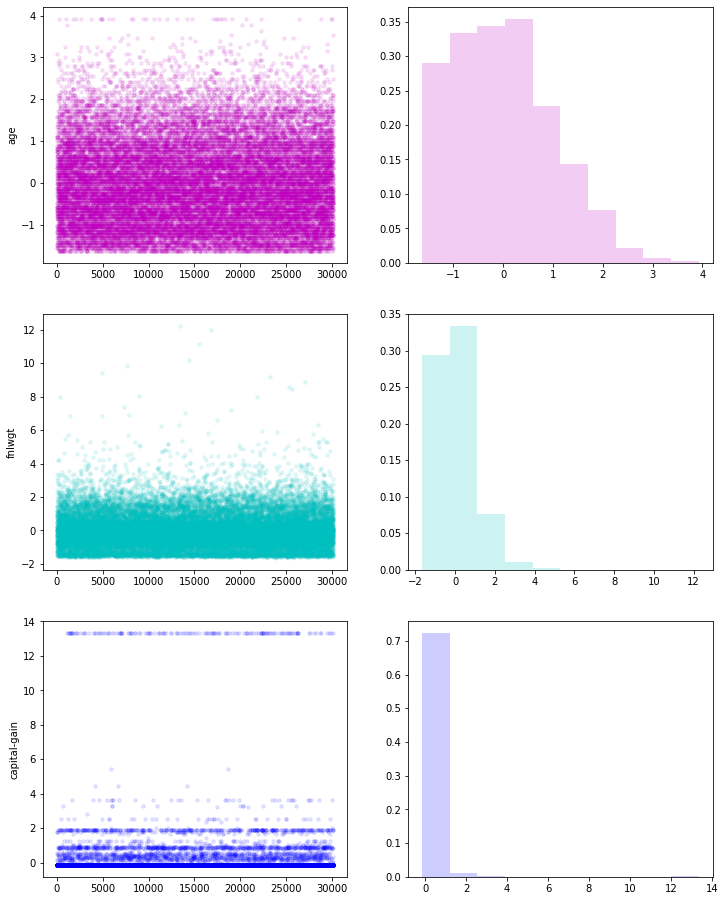

In [ ]:
#code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold

scaled_num_features = pd.DataFrame(scale(num_features), columns=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'])
age = scaled_num_features['age']
fnlwgt = scaled_num_features['fnlwgt']
capital_gain = scaled_num_features["capital-gain"]

f,ax = plt.subplots(3, 2, figsize=(12, 16))
# Scaled data
ax[0][0].scatter(range(len(age)), age, s=12, c='m', alpha=0.1)
ax[0][0].set(ylabel='age')
ax[0][1].hist(age, density=True, color='m', alpha=0.2)

ax[1][0].scatter(range(len(fnlwgt)), fnlwgt, s=12, c='c', alpha=0.1)
ax[1][0].set(ylabel='fnlwgt')
ax[1][1].hist(fnlwgt, density=True, color='c', alpha=0.2)

ax[2][0].scatter(range(len(capital_gain)), capital_gain, s=12, c='b', alpha=0.1)
ax[2][0].set(ylabel='capital-gain')
ax[2][1].hist(capital_gain, density=True, color='b', alpha=0.2)


loss_options = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']

def optimal_param_finder(classifier, param_name: str, options: [str]):
  parameters = {param_name: options}
  gs = GridSearchCV(classifier, parameters)
  gs.fit(scaled_num_features, target)
  results = gs.cv_results_

  means = results.get('mean_test_score')
  best_index = gs.best_index_
  best_param = gs.cv_results_['params'][best_index][param_name]
  print('----- ', classifier, ' -----')
  print('Best score: ', means[best_index])
  print('Best parameter: ', best_param)

optimal_param_finder(KNeighborsClassifier(), 'n_neighbors', range(1, 10))
optimal_param_finder(DecisionTreeClassifier(), 'max_depth', range(1, 18))
optimal_param_finder(SGDClassifier(max_iter=12000), 'loss', loss_options)

## Подбор гиперпараметров модели

**Задача 6.** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае:
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и максимальное число рассматриваемых признаков (*max_features*); используйте найденное ранее каличество деревьев
 - SGDClassifier — оптимизируемая функция (*loss*) и (*penalty*)

Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано выше.

Какой из алгоритмов имеет наилучшее качество?
Опишите новый результат.

Решение задачи оценивается в [4 балла].

In [ ]:
#code
def optimal_param_finder(classifier, parameters):
  gs = GridSearchCV(classifier, parameters)
  gs.fit(scaled_num_features, target)
  results = gs.cv_results_

  means = results.get('mean_test_score')
  best_index = gs.best_index_
  best_params = gs.cv_results_['params'][best_index]
  print('----- ', classifier, ' -----')
  print('Best score: ', means[best_index])
  print('Best parameters: ', best_params)

real_vector_metrics_options = ['euclidean', 'manhattan', 'chebyshev']
# real_vector_metrics_options = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis'] # some of these need additional parameter. Where to pass it?
criterion_options = ['gini', 'entropy']
loss_options = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalty_options = ['l2', 'l1', 'elasticnet']
max_features_options = ['auto', 'sqrt', 'log2']

optimal_param_finder(KNeighborsClassifier(), {'n_neighbors': range(1, 10), 'metric': real_vector_metrics_options})
optimal_param_finder(DecisionTreeClassifier(), {'max_depth': range(1, 18), 'criterion': criterion_options})
optimal_param_finder(SGDClassifier(max_iter=12000), {'loss': loss_options, 'penalty': penalty_options})

# Random Forest
best_params = {}
best_accuracy = 0
kf = KFold(n_splits=5, random_state=1, shuffle=True)

for c in criterion_options:
  for f in max_features_options:
    rand_forest = RandomForestClassifier(n_estimators=12, criterion=c, max_features=f)
    scores = cross_val_score(rand_forest, scaled_num_features, target, scoring='accuracy', cv = kf, n_jobs=-1)
    if np.mean(scores) > best_accuracy:
      best_accuracy = np.mean(scores)
      best_params = {'criterion': c, 'max_features': f}

print('----- ', RandomForestClassifier(n_estimators=12), ' -----')
print('Best score: ', best_accuracy)
print('Best parameter: ', best_params)

-----  KNeighborsClassifier()  -----
Best score:  0.8100260019934569
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 8}
-----  DecisionTreeClassifier()  -----
Best score:  0.828559248184499
Best parameters:  {'criterion': 'gini', 'max_depth': 8}
-----  SGDClassifier(max_iter=12000)  -----
Best score:  0.8086998409719136
Best parameters:  {'loss': 'log', 'penalty': 'l2'}
-----  RandomForestClassifier(n_estimators=12)  -----
Best score:  0.8015384329600108
Best parameter:  {'criterion': 'entropy', 'max_features': 'auto'}


**Задача 7.** Постройте для разных алгоритмов графики [кривых обучения](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html), изображающие зависимость качества на тестовой и обучающей выборках от количества объектов, на которых обучаются модели. Посмотрите на поведение кривых и ответьте на вопросы:
* Может ли с ростом числа объектов убывать качество на тестовой выборке? А на обучающей? Почему?
* Какой из алгоритмов лучше обучается на меньшем числе объектов?

Решение задачи оценивается в [4 балла].

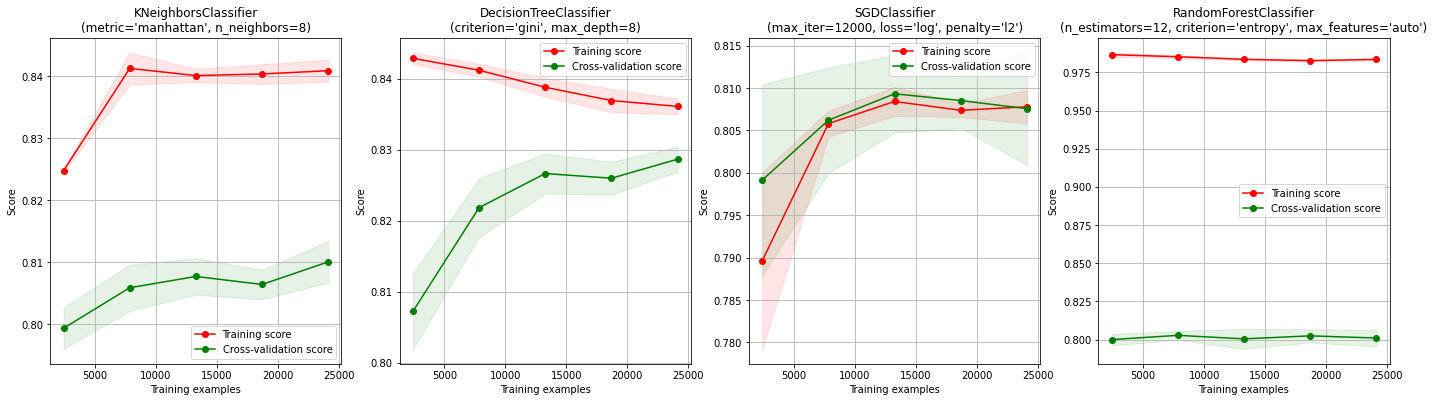

In [ ]:
#code
from sklearn.model_selection import learning_curve

_, ax = plt.subplots(1, 4, figsize=(24, 6))

estimators = [KNeighborsClassifier(metric='manhattan', n_neighbors=8),
              DecisionTreeClassifier(criterion='gini', max_depth=8),
              SGDClassifier(max_iter=12000, loss='log', penalty='l2'),
              RandomForestClassifier(n_estimators=12, criterion='entropy', max_features='auto')]

algorithms = ["KNeighborsClassifier\n(metric='manhattan', n_neighbors=8)",
              "DecisionTreeClassifier\n(criterion='gini', max_depth=8)",
              "SGDClassifier\n(max_iter=12000, loss='log', penalty='l2')",
              "RandomForestClassifier\n(n_estimators=12, criterion='entropy', max_features='auto')"]

for i in range(len(estimators)):
  train_sizes, train_scores, test_scores  = learning_curve(estimators[i], scaled_num_features, target)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  ax[i].grid()
  ax[i].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
  ax[i].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
  ax[i].set_title(algorithms[i])
  ax[i].set_xlabel("Training examples")
  ax[i].set_ylabel("Score")
  ax[i].plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
  ax[i].plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
  ax[i].legend(loc="best")

## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков.

**Задача 8.** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) / [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) из sklearn).

Решение задачи оценивается в [2 балла].

In [ ]:
#code
categorial_features = pd.get_dummies(income_data[['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']], drop_first=True)
# print(categorial_features)
# print(income_data)
# counter = 0
# for i, row_i in enumerate(income_data.index):
#   if row_i == categorial_features.index[i]:
#     counter += 1
#   else:
#     print('mismatch!', row_i, categorial_features.index[i])

all_features = pd.concat([scaled_num_features, categorial_features], axis=1).reindex(scaled_num_features.index)
target_df = pd.DataFrame(target, columns=['income'])
all_features = pd.concat([all_features, target_df], axis=1)
line_IDs_to_be_removed = anomalies_finder(all_features, list(all_features.columns))
all_features.drop(line_IDs_to_be_removed, inplace=True)
target = all_features['income']
all_features.drop('income', 1, inplace=True)
print('# of features: ', len(all_features.columns))
print(all_features)

# of features:  81
            age    fnlwgt  ...  native-country_Vietnam  native-country_Yugoslavia
0      0.042796 -1.062722  ...                     0.0                        0.0
1      0.880288 -1.007871  ...                     0.0                        0.0
2     -0.033340  0.244693  ...                     0.0                        0.0
3      1.108695  0.425240  ...                     0.0                        0.0
4     -0.794697  1.406658  ...                     0.0                        0.0
...         ...       ...  ...                     ...                        ...
30155  1.108695  1.250068  ...                     0.0                        0.0
30157 -0.870832  0.638972  ...                     0.0                        0.0
30159  1.489374 -0.358575  ...                     0.0                        0.0
30160 -1.251511  0.110705  ...                     0.0                        0.0
30161  1.032559  0.928841  ...                     0.0                        0

Так как после кодирования признаков получилось достаточно много(сколько?), в этой работе мы не будем подбирать заново оптимальные гиперпараметры для моделей с учетом новых признаков (хотя правильнее было бы это сделать).

**Задача 9.** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами, найденными ранее. Дало ли добавление новых признаков прирост качества? Измеряйте качество, как и раньше, используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score).

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?
Для всех ли методов результат улучшился?
Может ли добавление новых признаков ухудшить результа?

Решение задачи оценивается в [3 балла].

In [ ]:
#code
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, random_state=1, shuffle=True)

# -----  KNeighborsClassifier()  -----
# Best score:  0.8100260019934569
# -----  DecisionTreeClassifier()  -----
# Best score:  0.828559248184499
# -----  SGDClassifier(max_iter=12000)  -----
# Best score:  0.8086998409719136
# -----  RandomForestClassifier(n_estimators=12)  -----
# Best score:  0.8015384329600108

knn = KNeighborsClassifier(n_neighbors=8, metric='manhattan')
knn.fit(all_features, target)
scores = cross_val_score(knn, all_features, target, scoring='accuracy', cv = kf, n_jobs=-1)
best_accuracy = np.mean(scores)
print("KNeighborsClassifier(n_neighbors=8, metric='manhattan') accuracy: ", best_accuracy)

dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=8)
dec_tree.fit(all_features, target)
scores = cross_val_score(dec_tree, all_features, target, scoring='accuracy', cv = kf, n_jobs=-1)
best_accuracy = np.mean(scores)
print("DecisionTreeClassifier(criterion='gini', max_depth=8) accuracy: ", best_accuracy)

sgd = SGDClassifier(max_iter=12000, loss='log', penalty='l2')
sgd.fit(all_features, target)
scores = cross_val_score(sgd, all_features, target, scoring='accuracy', cv = kf, n_jobs=-1)
best_accuracy = np.mean(scores)
print("SGDClassifier(max_iter=12000, loss='log', penalty='l2') accuracy: ", best_accuracy)

rand_forest = RandomForestClassifier(n_estimators=12, criterion='entropy', max_features='auto')
rand_forest.fit(all_features, target)
scores = cross_val_score(rand_forest, all_features, target, scoring='accuracy', cv = kf, n_jobs=-1)
best_accuracy = np.mean(scores)
print("RandomForestClassifier(n_estimators=12, criterion='entropy', max_features='auto') accuracy: ", best_accuracy)

# KNeighborsClassifier wins here

KNeighborsClassifier(n_neighbors=8, metric='manhattan') accuracy:  0.7914581770876913
DecisionTreeClassifier(criterion='gini', max_depth=8) accuracy:  0.8273001725386881
SGDClassifier(max_iter=12000, loss='log', penalty='l2') accuracy:  0.8060166054733887
RandomForestClassifier(n_estimators=12, criterion='entropy', max_features='auto') accuracy:  0.8123479091806292


## Смешивание моделей

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказания путем смешивания разных моделей. Давайте посмотрим, действительно ли такой подход дает прирост в качестве.

Выберете из построенных моделей двух предыдущих пунктов две, которые дали наибольшее качество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**Задача 10.**
При реализации своих моделей хорошей практикой является создание sklearn-совместимых классов. Во-первых, такая реализация будет иметь стандартный интерфейс и позволит другим людям безболезненно обучать реализованные вами модели. Во-вторых, появляется возможность использовать любой функционал пакета sklearn, принимающий на вход модель, например, класс *GridSearchCV*, *learning_curve* и другие.

Создайте классификатор, который инициализируется двумя произвольными классификаторами и параметром $\alpha$. Во время обучения такой классификатор должен обучать обе базовые модели, а на этапе предсказания замешивать предсказания базовых моделей по формуле, указанной выше.

Для создания пользовательского классификатора необходимо отнаследоваться от базовых классов [BaseEstimator](http://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), [ClassifierMixin](http://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html) и реализовать методы **\_\_init\_\_**, **fit**, **predict** и **predict_proba**. Пример sklearn-совместимого классификатора с комментариями можно найти [здесь](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator)

Решение задачи оценивается в [3 балла].

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [ ]:
#code

**Задача 11.** Подберите по сетке от 0 до 1 значение $\alpha$ для этого классификатора. Если класс реализован правильно, то вы cможете использовать *GridSearchCV*, как в случае с обычными классификаторами.

Изобразите на графике среднее качество по фолдам и доверительный интервал в зависимости от $\alpha$.

Дал ли этот подход прирост к качеству по сравнению с моделями, обученными по-отдельности?
Сильный ли прирост?

Решение задачи оценивается в [2 балла].

In [ ]:
#code

**Задача 12** Придумайте свой классификатор на основе замешивания. Попытайтесь объяснить как вы его придумали. Попробуйте его реализовать, если, конечно, у вас хватит сил и терпения :)


Не приступайте к этому заданию не решив задачу 11.

Решение задачи оценивается в [4 балла].

In [ ]:
#code

## Сравнение построенных моделей


После того как было построено много моделей правильным продолжением является сравнение их между собой. ["ящик с усами"](https://ru.wikipedia.org/wiki/Ящик_с_усами) - он же диаграмму размаха.

Воспользуйтесь им для визуализации. Поиск функций для его отрисовки я специально не предоставил. Однако он точно есть в стандартном пакете matplotlib, с которым вы знакомились во второй лабораторной.

**Задача 13.** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели, выберете тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха. Все классификаторы должны быть изображены на одном графике.

Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели, сложно ли реализовывать подобные эксперименты, с какими основными проблемами вы столкнулись).

Решение задачи оценивается в [3 балла].

In [ ]:
#code